# EDA

##  3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('cleaned.csv')

In [6]:
df[df.duplicated('App')].shape

(1181, 17)

 There are duplicate records . Deleting Duplicates

In [8]:
df=df.drop_duplicates(subset=['App'],keep='first')

# No. of Categorical and Numerical Columns

In [12]:
numericFeatures=[feature for feature in df.columns if df[feature].dtype!='O']
categoricalFeatures=[feature for feature in df.columns if df[feature].dtype=='O']
print('We have {} numerical features:{} '.format(len(numericFeatures),numericFeatures))
print('We have {} numerical features:{} '.format(len(categoricalFeatures),categoricalFeatures))

We have 9 numerical features:['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year'] 
We have 8 numerical features:['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 


In [13]:
## porportion of count data on categorical columns
for col in categoricalFeatures:
    print(df[col].value_counts(normalize=True)*100)
    print('-------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
-------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.82

## Anaysis of Numerical Features

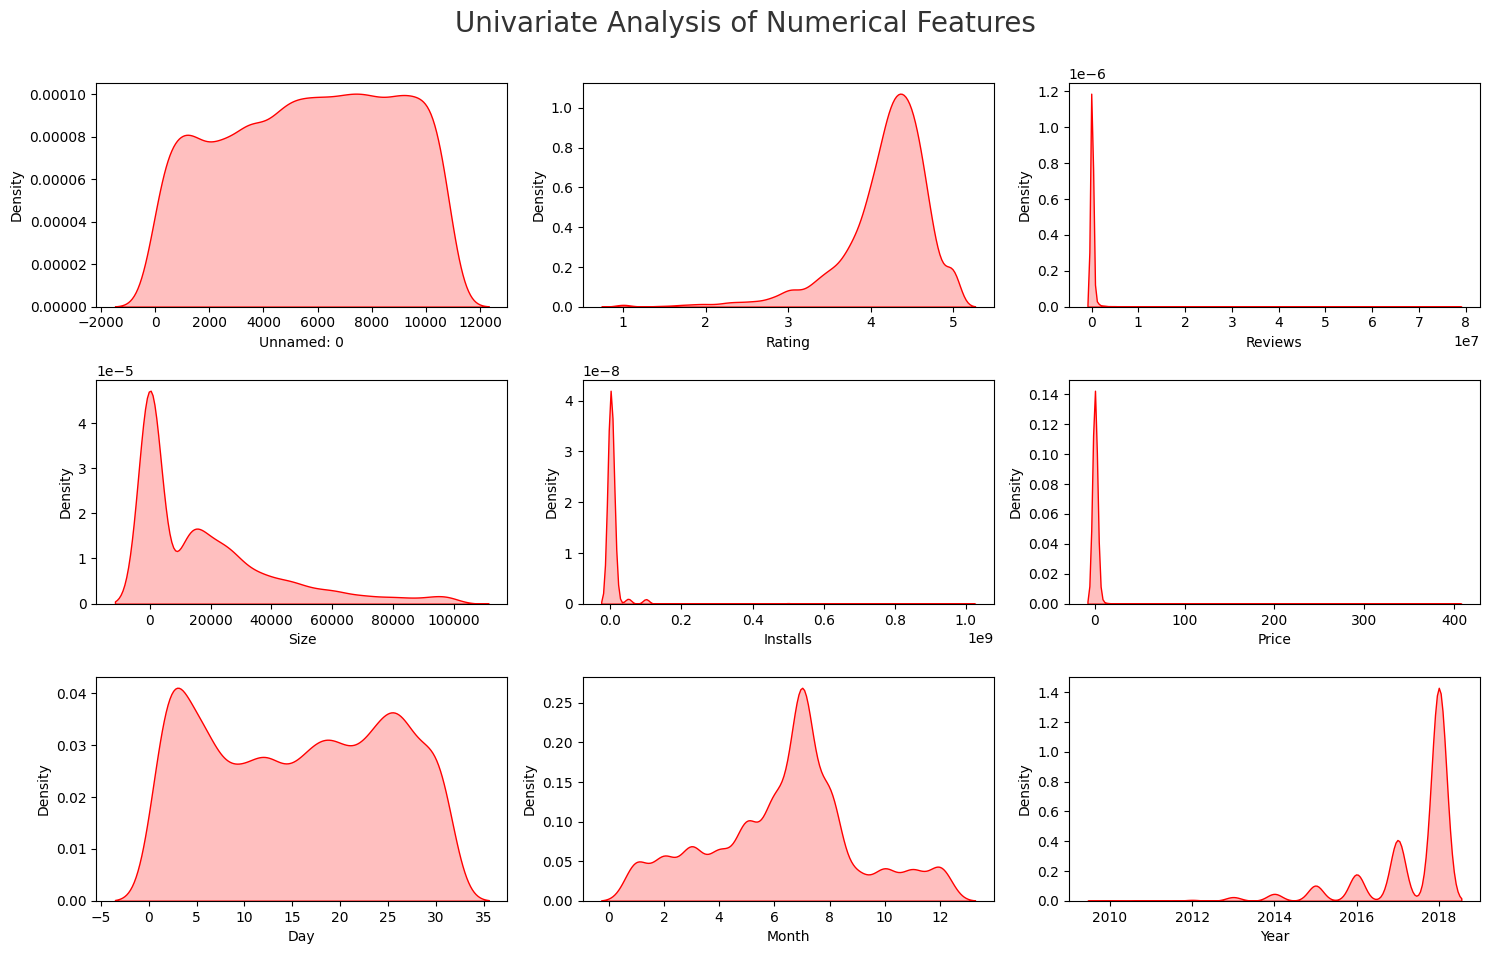

In [17]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,alpha=0.8,y=1)

for i in range(0,len(numericFeatures)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numericFeatures[i]],shade=True,color='r')
    plt.xlabel(numericFeatures[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

# Categories with most Apps

<Axes: ylabel='count'>

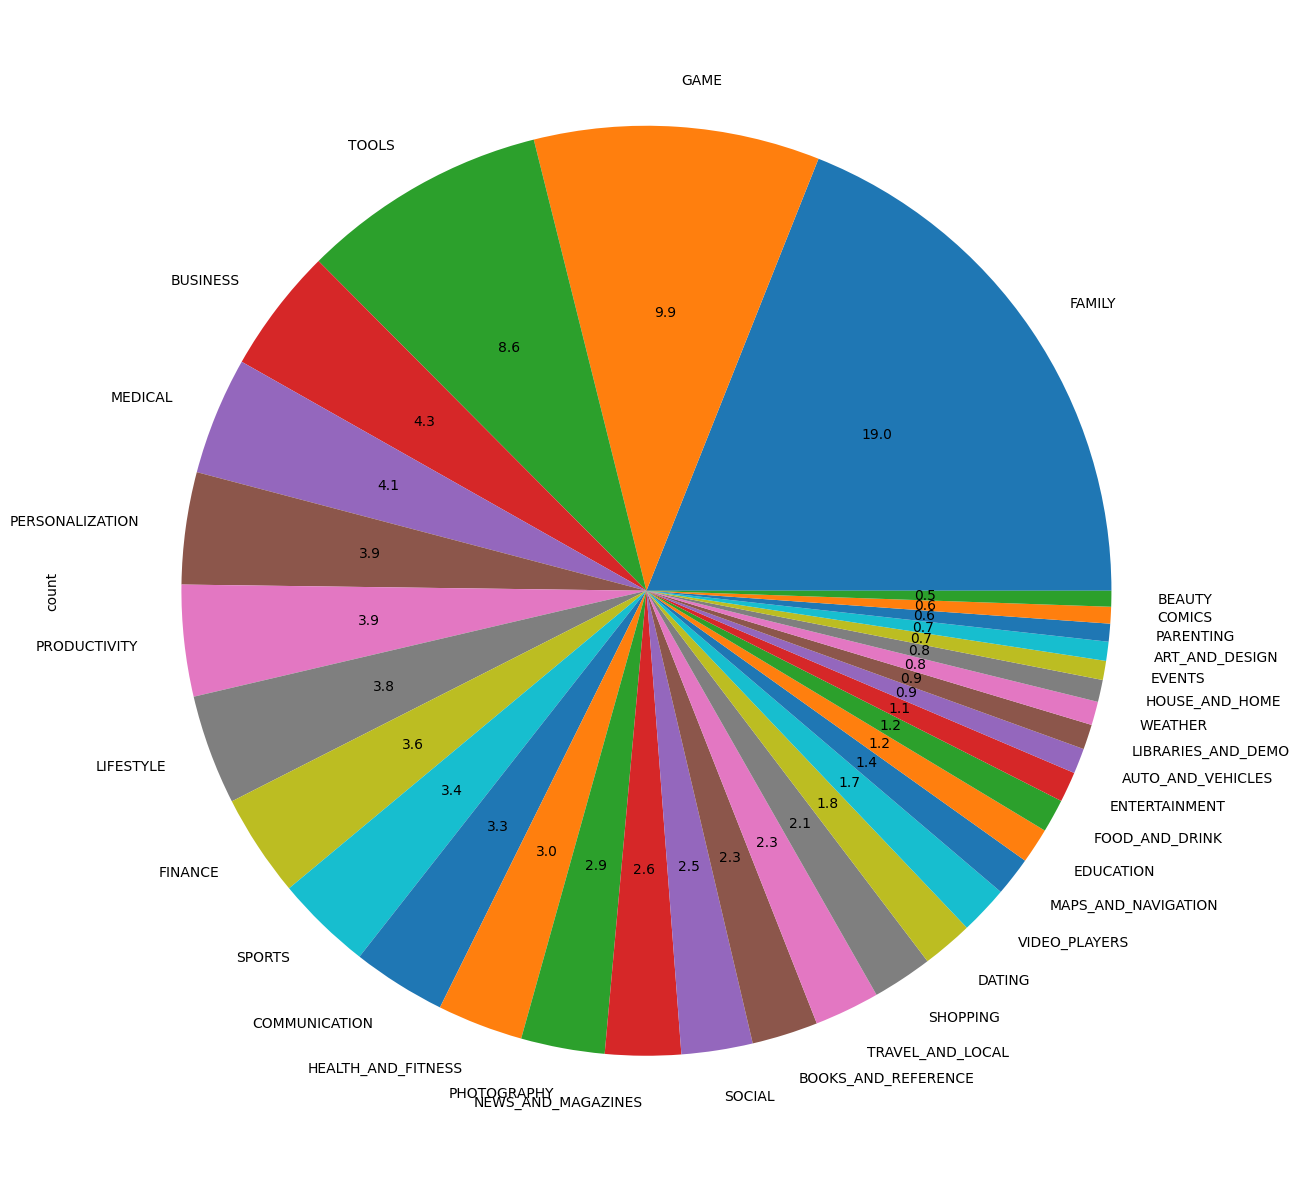

In [18]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [25]:
category=pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


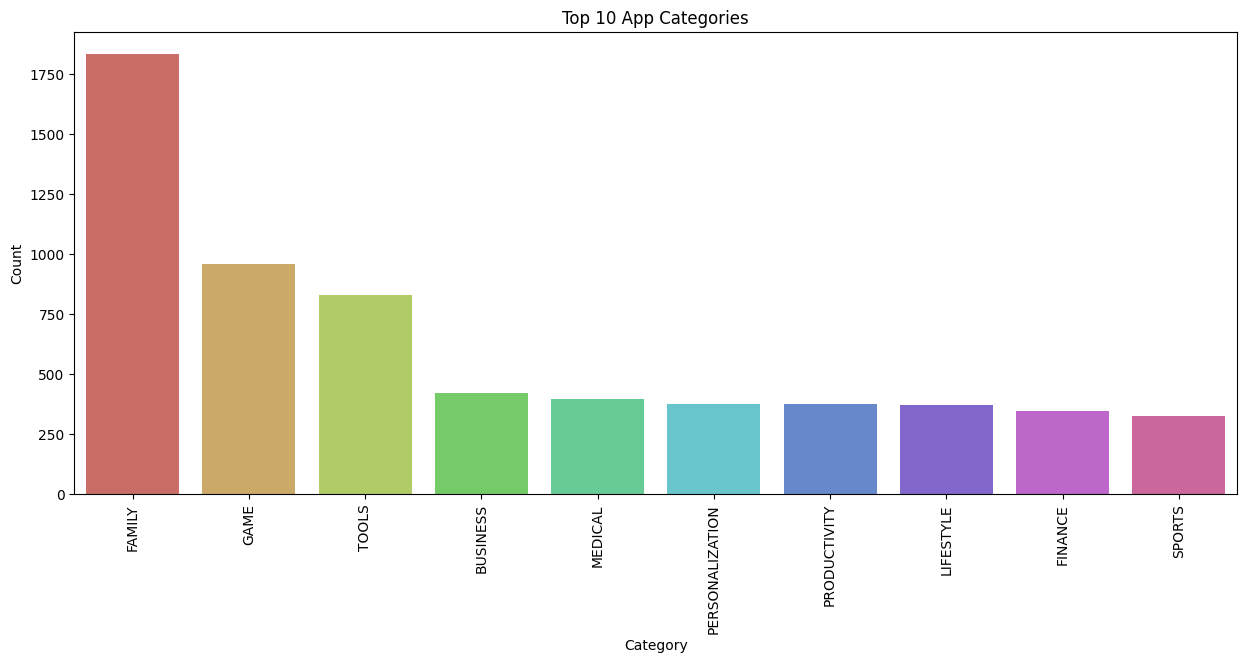

In [29]:
category = pd.DataFrame(df['Category'].value_counts()).reset_index()
category.columns = ['Category', 'Count']
plt.figure(figsize=(15,6))
sns.barplot(x='Category', y='Count', data=category[:10],palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()



## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

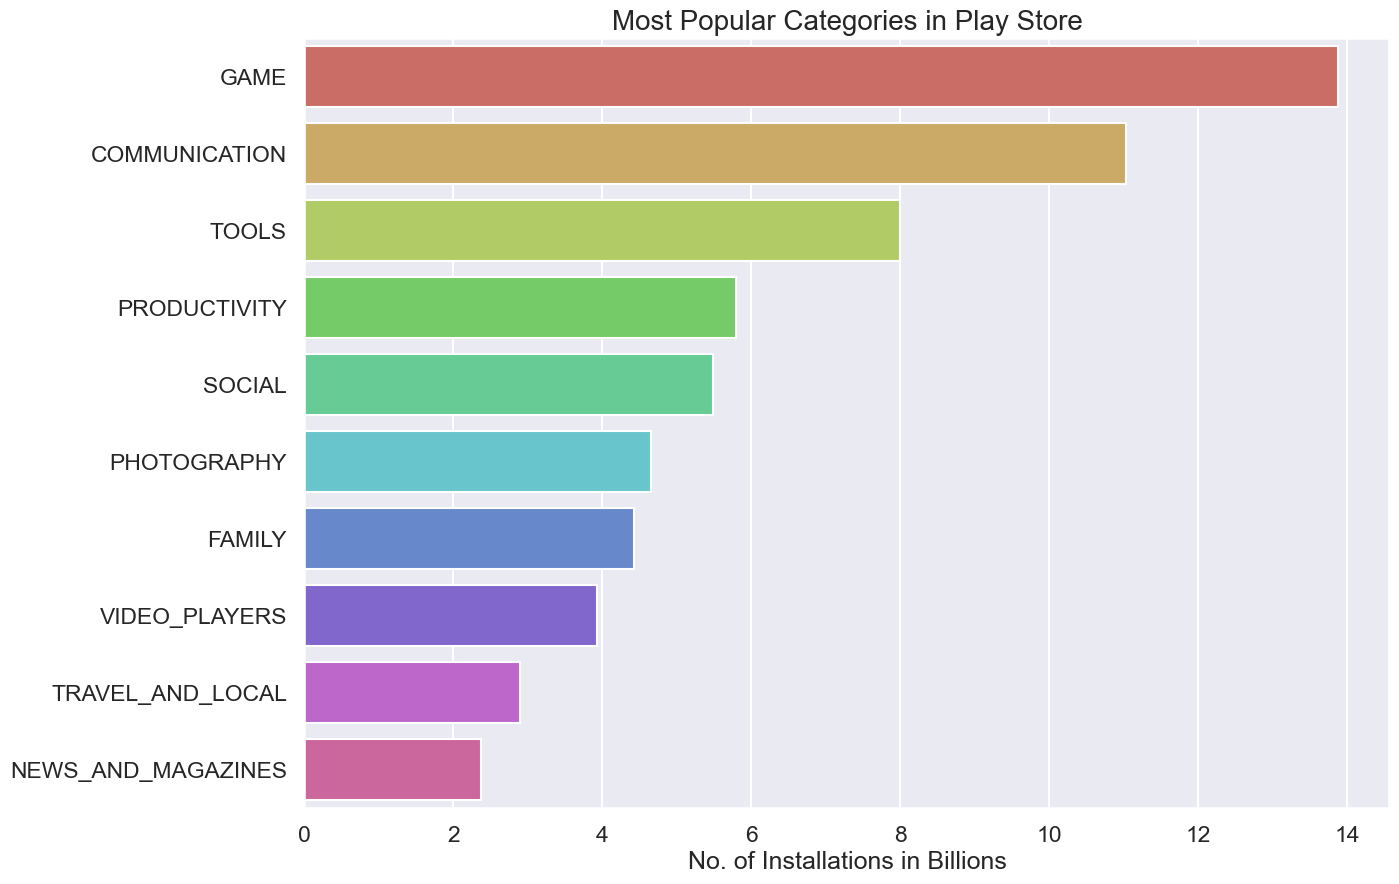

In [33]:
df_cat_installs=df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs.Installs=df_cat_installs.Installs/1000000000# converting into billions
df2=df_cat_installs.head(10)
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2,palette="hls" )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 4 most installed Apps in Each popular Categories ??


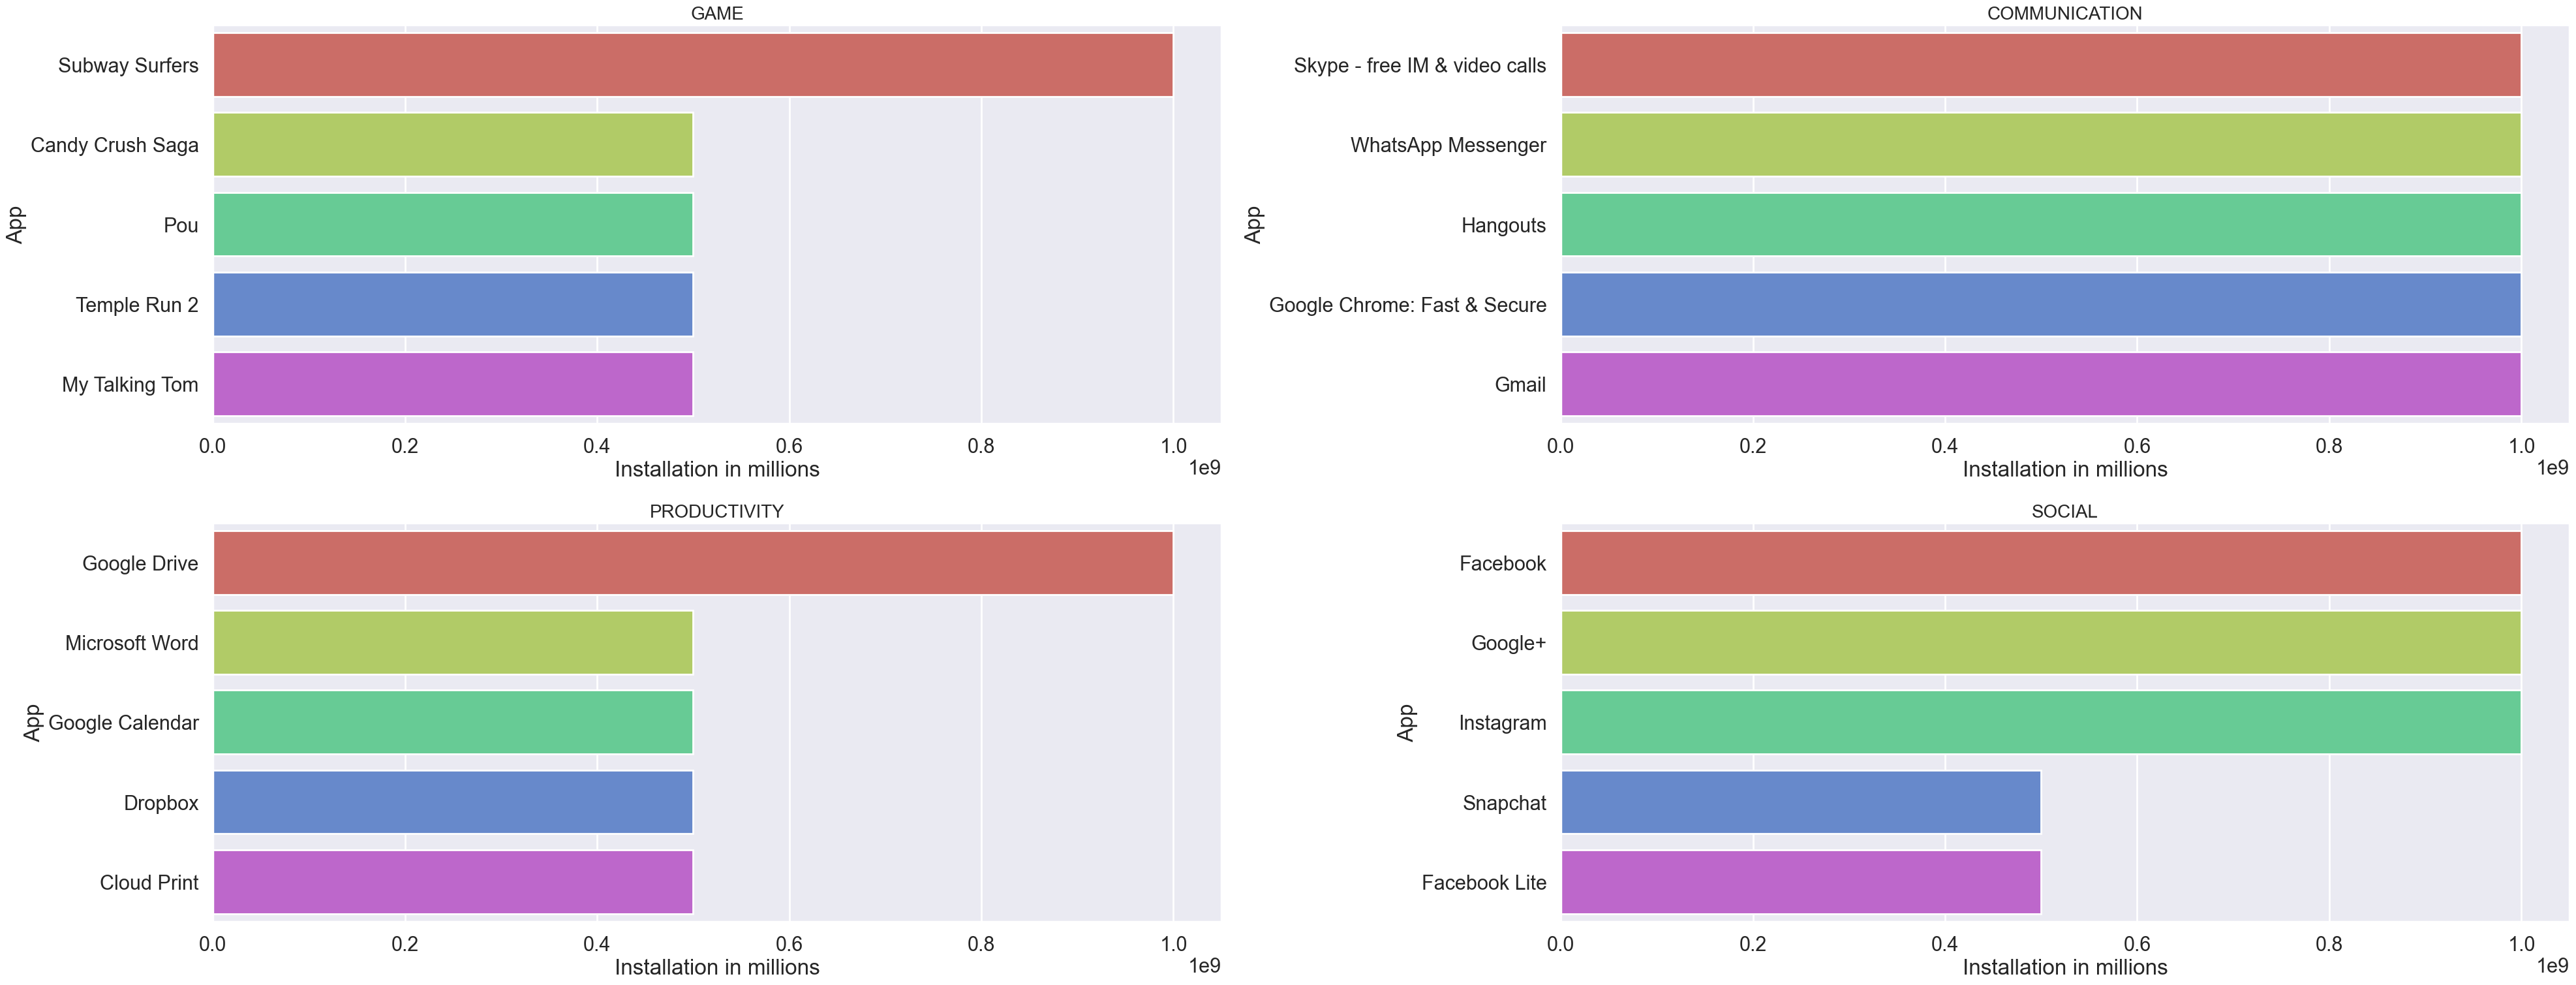

In [ ]:
dfa=df.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa=dfa.sort_values('Installs',ascending=False)
apps=['GAME',"COMMUNICATION","PRODUCTIVITY","SOCIAL"]
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))
for i,app in enumerate(apps):
    df2=dfa[dfa.Category==app]
    df3=df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data=df3,x='Installs',y='App',palette="hls")
    plt.xlabel('Installation in millions')
    plt.title(app,size=20)
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.